# Проект 
направлен на анализ работы "Метнапромбанк", в части работы с клиентами, а именно использование клиентами продуктов/услуг банка. Исследование направлено на основе изученных данных помочь в дальнейшем разработать меры по эффективной работе с клиентами(улучшение продуктов/услуг, улучшение работы с клиентами). Задача проекта: проанализировать клиентов банка и сегментировать по характеристикам и потребностям.

ссылка на отредактированную презентацию https://disk.yandex.ru/i/loogYjjKC1E9dA

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Lasso, Ridge
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.style.use('ggplot')
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import dendrogram, linkage 
import numpy as np
#from IPython.display import display

#import scipy.stats as stats
from scipy import stats as st
import numpy as np
import math as mth
#import plotly.express as px
#import plotly.graph_objects as go

from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

#import requests

#plt.style.use('seaborn-darkgrid') 
#sns.set_palette('bright')

In [2]:
bank = pd.read_csv('/datasets/bank_dataset.csv', sep=',')

In [3]:
def display_info(bank):
    
    display(bank.info())
    display(bank.describe())
    display(bank.isna().sum())
    display(bank.duplicated().sum())
    display(bank.head(10))
display_info(bank)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

0

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


<div class="alert alert-info"> <b>Коментарии студента :</b> 10000 строк в датасете в каждом столбце, кроме Balance 6383. Количество пропущенных значений до заполнений 3617 в balance, в предобработке узнаем сколько после заполнения.

## Предобработка данных

In [4]:
# Приведем столбцы к нижнему регистру
bank.columns=bank.columns.str.lower()

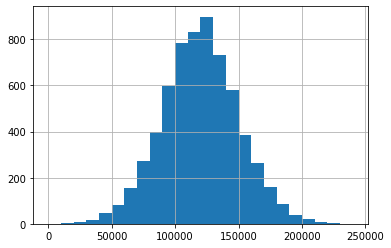

In [5]:
### КОД РЕВЬЮЕРА
# смотрим на распределение до импутации данных
bank.balance.hist(bins=np.arange(0,2.5e5,1e4));

In [6]:
# количество значений после заолнения, посчитаем медианный баланс сити, пола, и возраста
srednie=(bank.groupby(['city','gender','age'],as_index=False).agg({'balance':'median'})).rename(columns={'balance':'median_balance'})
bank=bank.merge(srednie, on=['city','gender','age'])
bank.loc[bank['balance'].isna(), 'balance']=bank.loc[bank['balance'].isna(), 'median_balance']
bank=bank.drop('median_balance', axis=1)

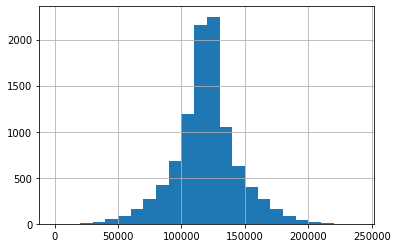

In [7]:
### КОД РЕВЬЮЕРА
# смотрим на распределение после импутации данных
bank.balance.hist(bins=np.arange(0,2.5e5,1e4));

In [8]:
# кол-во пропусков знач.
bank['balance'].isna().sum()

28

In [9]:
# Убираем пропуски
bank=bank.dropna()

In [10]:
bank['balance'].isna().sum()

0

In [11]:
# удалю юзер айди изза своей уникальности каждой записи, значения не могут быть признаками
bank = bank.drop(columns=['userid'])

## Исследовательский анализ

### Анализ средних значений признаков

In [12]:
# посмотрю таблицу средних значений
describe = bank.describe()
mode = bank.mode(axis=0).dropna().rename({0: 'mode'}, axis='index')

mct = pd.concat([describe, mode], sort=False).T

display(mct)

,count,mean,std,min,25%,50%,75%,max,mode
score,9972.0,650.462896,96.614884,350.0,584.0,652.0,717.0,850.0,850.0
age,9972.0,38.829322,10.322604,18.0,32.0,37.0,44.0,92.0,37.0
objects,9972.0,5.013438,2.891828,0.0,3.0,5.0,7.25,10.0,2.0
balance,9972.0,119792.839466,24934.547569,3768.69,107719.165,119656.45,131394.56,250898.09,124314.45
products,9972.0,1.529683,0.581896,1.0,1.0,1.0,2.0,4.0,1.0
creditcard,9972.0,0.705275,0.455942,0.0,0.0,1.0,1.0,1.0,1.0
loyalty,9972.0,0.51434,0.499819,0.0,0.0,1.0,1.0,1.0,1.0
estimated_salary,9972.0,100107.398451,57499.517203,11.58,51014.8375,100218.21,149388.2475,199992.48,24924.92
churn,9972.0,0.204172,0.403115,0.0,0.0,0.0,0.0,1.0,0.0
city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ярославль


<div class="alert alert-info"> <b>Коментарии студента :</b> По данным можно сказать что:клиентов 9972 чел., кредитный скоринг 650 баллов, средний возраст 38 лет, по 5 обьектов, с балансом 119 тыс., пользуются 1-2 продуктами в среднем, кредитная карта больше да чем нет, с зп все ок у клиентов в районе 100 тыс. лояльность 50/50, отток в райне 20 процентов.

### Анализ признаков сегментации по оттоку клиентов

In [13]:
# Проверим средние значения  в двух группах — тех, кто ушел в churn и тех, кто остался.
display(bank.groupby('churn')['creditcard'].agg('count'))

churn
0    7936
1    2036
Name: creditcard, dtype: int64

In [14]:
# проверим медианные и средние значения
display(bank.groupby('churn').agg('median'))
display(bank.groupby('churn').agg('mean'))

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,
0,653,36,5,119656.450,2,1,1,99649.585
1,646,45,5,119655.105,1,1,0,102489.335


,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,
0,651.757308,37.290449,5.034022,119649.935032,1.543599,0.706905,0.553679,99746.350218
1,645.417485,44.827603,4.933202,120349.857925,1.475442,0.698919,0.361002,101514.706297


In [15]:
bank['churn'].describe()

count    9972.000000
mean        0.204172
std         0.403115
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

<div class="alert alert-info"> <b>Коментарии студента :</b> score относительно равное и для тех и для тех - 645-650 баллов в среднем. Средний возраст оттока (45 лет),больше чем возраст тех, кто остался в банке (37 лет).Среднее количество объектов в собственности у обоих групп - 5. В среднем баланс у оттока 1200349, кто остался - 119650. И там и там пользуются 1 банковским продуктом в среднем.В оттоке 70 процентов клиентов с кредитными картами. Среди тех, кто в оттоке, только 36% были активными клиентами; а среди тех, кто остался, 55% - это активные клиенты. Средняя зп в оттоке  (101465) выше, чем средняя зп кто остались клиентами банка (99738).

In [16]:
mode =bank['churn'].mode()
modu = pd.concat([mode])
display(modu)

0    0
dtype: int64

In [17]:
bank['churn'].mode().item()

0

In [18]:
### КОД РЕВЬЮЕРА
# тут имелось ввиду следуюее:
mode_churn = pd.Series(bank.query('churn == 1').mode().loc[0],name="churn")
mode_no_churn = pd.Series(bank.query('churn == 0').mode().loc[0],name="no_churn")
pd.concat((mode_churn,mode_no_churn),axis=1).drop(['score','estimated_salary','balance'])\
  .style.set_caption("Mode")

,churn,no_churn
city,Ростов Великий,Ярославль
gender,Ж,М
age,46.000000,35
objects,1.000000,7
products,1.000000,2
creditcard,1.000000,1
loyalty,0.000000,1
churn,1.000000,0


In [19]:
# Построим распределения каждой величины в разбивке по оттоку
sns.set_theme(style="darkgrid")
sns.set_palette(['cornflowerblue','green'])

In [20]:
def function_hist(data,column):
    'Функция строит гистограмму распределения колонки column из датафрейма data'
    sns.displot(data,x=column,hue='churn')
    plt.title('Распределение '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.show()

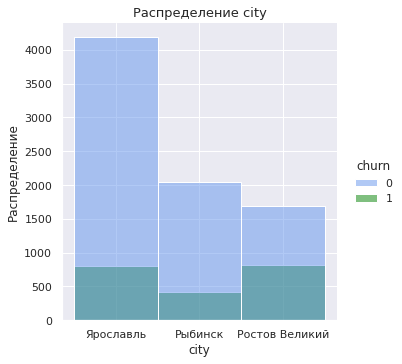

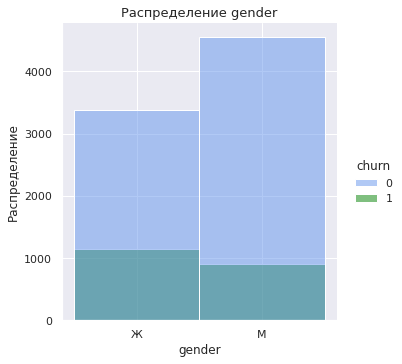

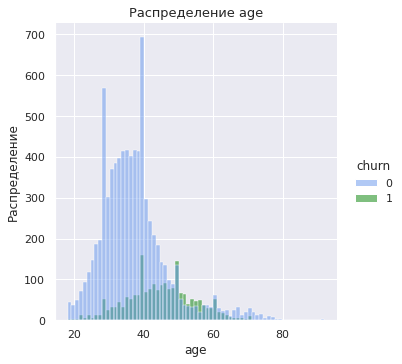

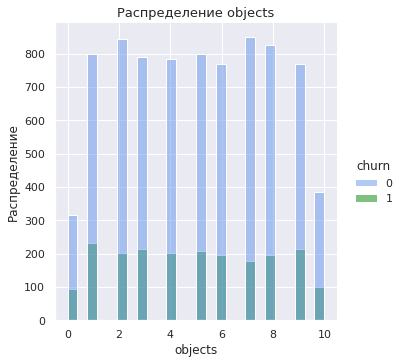

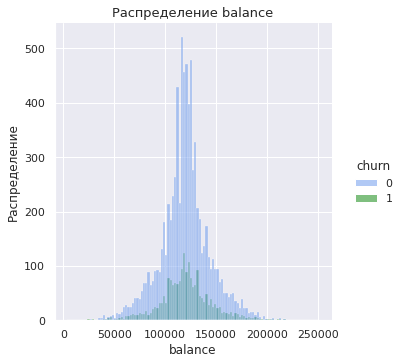

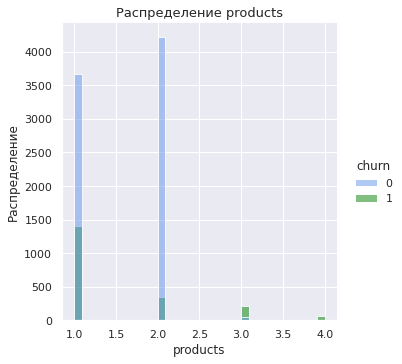

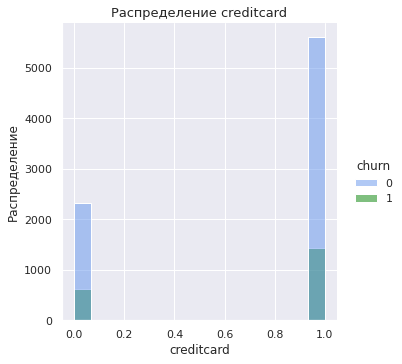

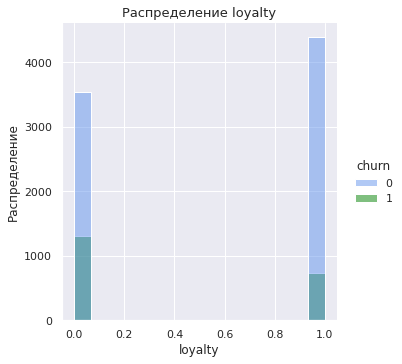

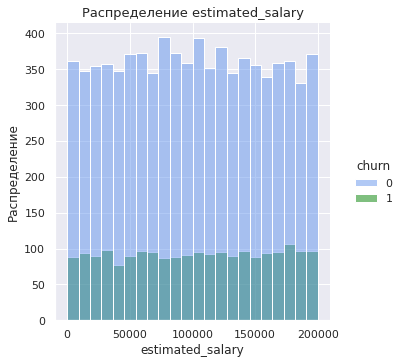

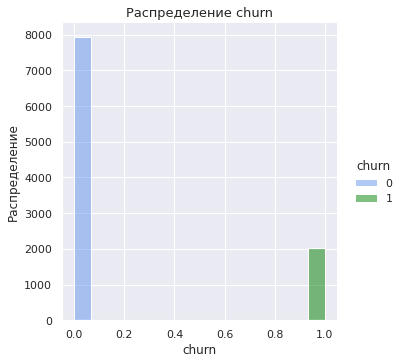

In [21]:
for name in bank.columns[1::]:
    function_hist(bank,name)

<div class="alert alert-info"> <b>Коментарии студента :</b> Судя по графикам, можно понять что: почти все клиенты с количеством продуктов 3 и 4 ушли а  клиенты с количеством продуктов 2 уходят реже всего, зп клиентов рассчитывается на основе данных со стороны (пенсионный фонд, налоговые выкладки), поэтому есть пользователи с зп меньше минимальной.Баланс и баллы кредитного скориннга распределены относительно одинаково,не активные клиенты уходят чаще чем активные, в основном уходят пользователеи старше, Женщины уходядт чаще мужчин.

### Кореляция

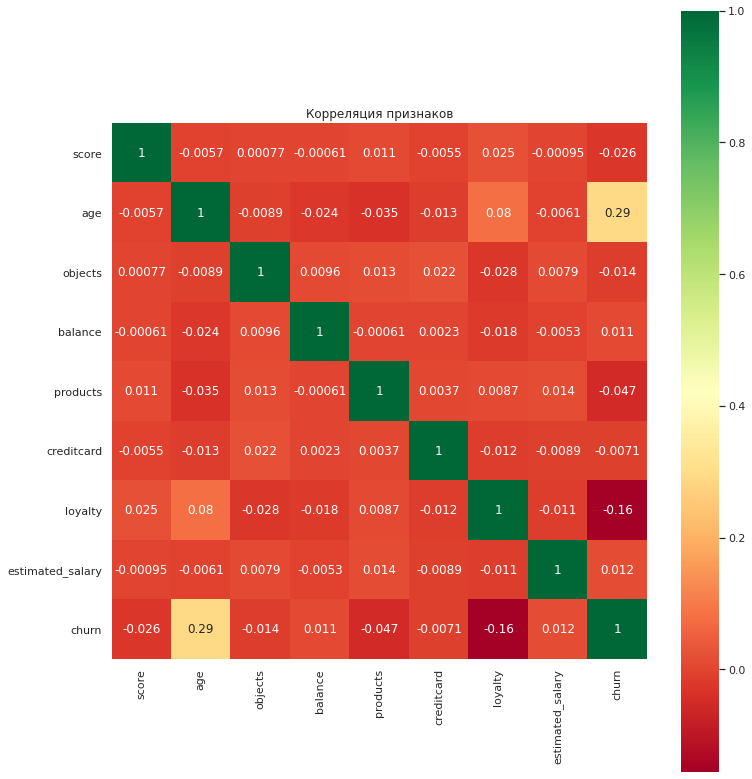

In [22]:
# строю график матричной кореляции и вывожу тепловую карту
fig, ax = plt.subplots(figsize=(12,14))

sns.heatmap(bank.corr(), annot = True, square=True, cmap="RdYlGn")
ax.set_title("Корреляция признаков")
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> По тепловой карте можно заметить, что заметных кореляций не наблюдается, все кореляции имеют слабые признаки. Нет явных признаков клиентов банкка к оттоку. Наибольшая из всех корреляций(которая считается все равно слабой) является , отток-возраст клиентов 0.29 , а также отток-лояльность 0.16. 

### Анализ признаков сегментации по количеству услуг/продуктов

In [23]:
#еще раз обратим внимание на количество продуктов/услуг используемых
display(bank.groupby('products')['age'].agg('count'))

products
1    5076
2    4570
3     266
4      60
Name: age, dtype: int64

<div class="alert alert-info"> <b>Комментарий студента:</b> Как было сказано раньше и посчитано раньше в основном пользуются 1-2 продуктами/услугами.

In [24]:
display(bank.groupby('products').agg('mean'))

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,
1,649.159574,39.632979,4.975374,119843.328747,0.703310,0.503940,99500.742640,0.277384
2,652.006783,37.592560,5.052516,119724.864362,0.707221,0.531510,100475.002534,0.076149
3,648.105263,43.195489,5.003759,119569.625639,0.714286,0.424812,104318.130564,0.827068
4,653.583333,45.683333,5.300000,121688.464583,0.683333,0.483333,104763.723333,1.000000


In [25]:
display(bank.groupby('products')['churn'].agg('mean'))

products
1    0.277384
2    0.076149
3    0.827068
4    1.000000
Name: churn, dtype: float64

<div class="alert alert-info"> <b>Комментарий студента:</b> по показателями: score 2,4. , age 3-4 продукта обычно у старших, 1-2 услуги у младших, лояльность обычно кто пользуется 1-2 продукта, но кто пользуется 1-2 продукта меньше зп.

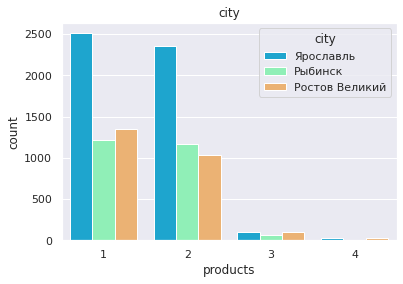

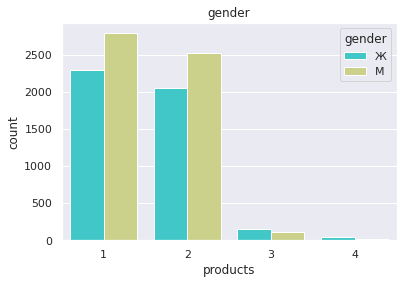

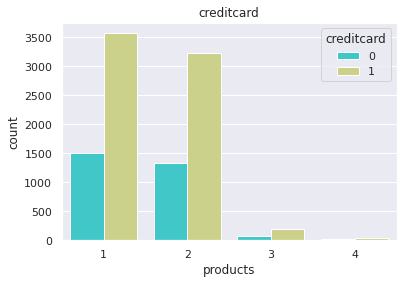

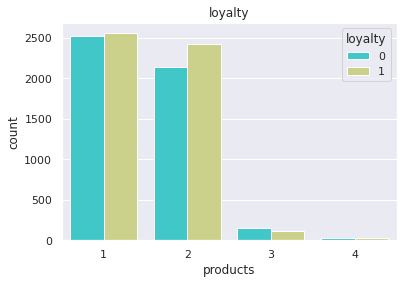

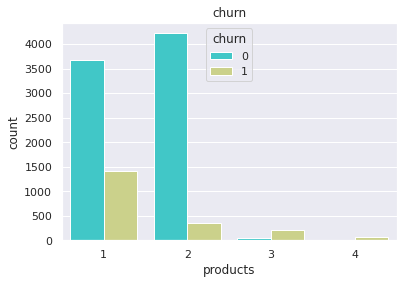

In [26]:
# визуализирую распределения в виде графиков
for exlap in ['city', 'gender', 'creditcard', 'loyalty', 'churn']:
    sns.countplot(x='products', hue=exlap, data=bank, palette='rainbow').set_title(exlap)
    plt.show()

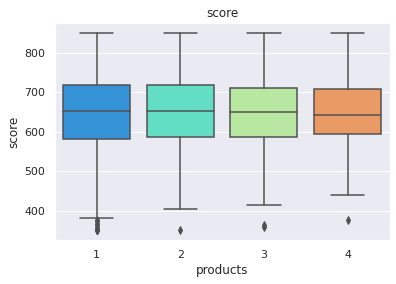

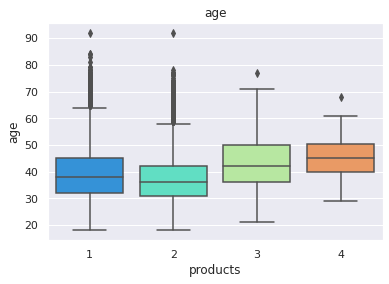

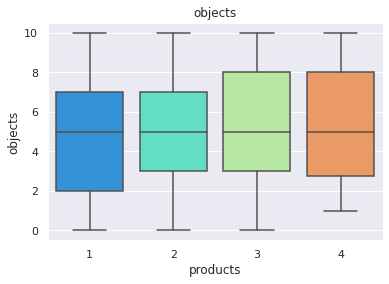

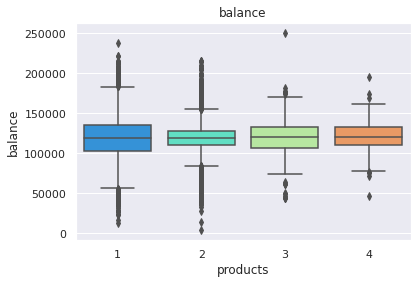

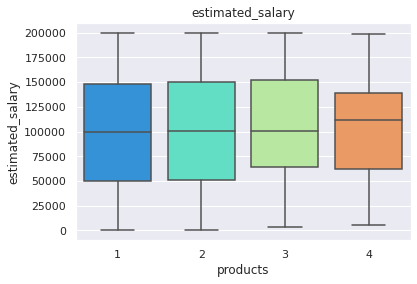

In [27]:
for exlap in ['score', 'age', 'objects', 'balance', 'estimated_salary']:
    sns.boxplot(x='products',y=exlap, data=bank,palette='rainbow').set_title(exlap)
    plt.show() 


<div class="alert alert-info"> <b>Комментарий студента:</b>Как было сказано ранее Лояльность больше у младшихкоторые пользуются 1-2 продукта и зп меньше, у старших зп больше, пользуются больше продуктами/услугами, но я влятся валотильными с большим оттоком.

<div class="alert btn-primary"><b>Вывод V_3:</b><br>
    
Согласно приведенных графиков выше, можно что:
    
    
- Ярославль городв котором клиенты пользуются больше услугами банка
    
- Мужчины больше пользуются услугами банка
    
- Клиенты с 3-4 продуктами старше чем клиенты с 1-2 продуктами
    
- Судя по графику , если продуктов больше то и обьектов собственности больше и наоборот
    
- Низкий баланс у клиентов во второй группе, высокий баланс в первой и четвертой
    
- Клиенты с 1-2 продуктами зарабатывают не много меньше чем клиенты с 3-4 продуктами , но разница не большая
    
- Разница между средними зарплатами незначительная

- Отток выше у тех, кто пользуется 1 продуктом, и меньше у тех , кто пользуется 2 продуктами банка.</div> 

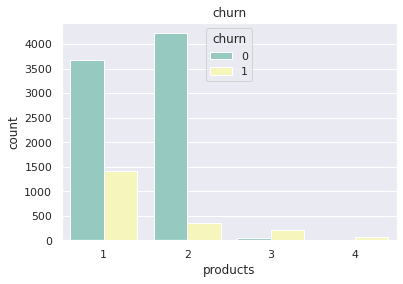

In [28]:
for exlap in ['churn']:
    sns.countplot(x='products', hue=exlap, data=bank, palette="Set3").set_title(exlap)
    plt.show()

In [29]:
bank.groupby('products')['churn'].agg('mean')

products
1    0.277384
2    0.076149
3    0.827068
4    1.000000
Name: churn, dtype: float64

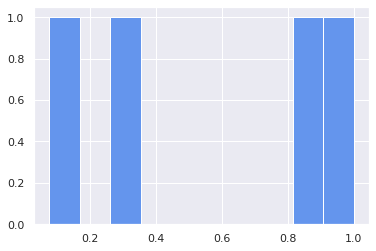

In [30]:
h = bank.groupby('products')['churn'].agg('mean').hist()
fig = h.get_figure()

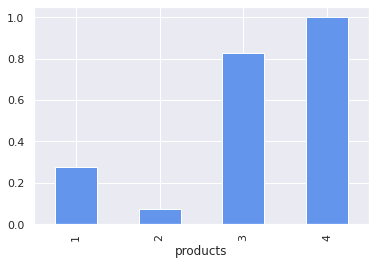

In [31]:
h = bank.groupby('products')['churn'].agg('mean').plot.bar()
fig = h.get_figure()

## Кластеризация

In [32]:
# Проведу кластерный анализ который выполнит сбор данных, упорядочит обьекты в однородные группы, для подготовки данных для кластеризации, удалю два столба city и gender
bank_klaster = bank.drop(columns=['city', 'gender'])

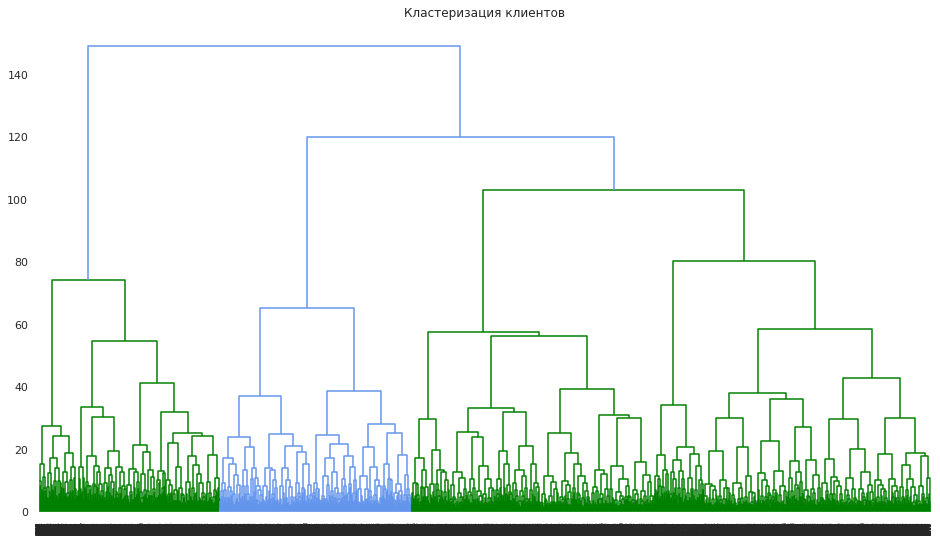

In [33]:
# Стандаризирую и визиализирую данные
sc = StandardScaler()
X_sc = sc.fit_transform(bank_klaster)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> выделются четыре класстера клиентов

In [34]:
# запускаю алгорит k_means с числом кластеров 4,прогназирую кластеры для наблюдений
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(X_sc)
bank_klaster['cluster'] = labels

In [35]:
# проверю численность кластеров
bank_klaster.cluster.value_counts()

2    3107
1    2503
3    2328
0    2034
Name: cluster, dtype: int64

<div class="alert alert-info"> <b>Комментарий студента:</b> Многочисленный кластер номер 2, малочисленный нулевой

In [36]:
# посмотрю статистику по mean признаков по кластеру
bank_klaster.groupby('cluster').mean().T

cluster,0,1,2,3
score,645.412488,648.246504,654.140972,652.349656
age,44.852016,35.465841,38.687480,37.372852
objects,4.931662,5.165801,5.018989,4.913660
balance,120348.769304,120420.668688,119300.744350,119288.853937
products,1.474926,1.556133,1.538140,1.537801
creditcard,0.699607,1.000000,1.000000,0.000000
loyalty,0.360374,0.000000,1.000000,0.553694
estimated_salary,101502.401529,100538.868426,98776.025851,100201.543235
churn,1.000000,0.000000,0.000000,0.000859


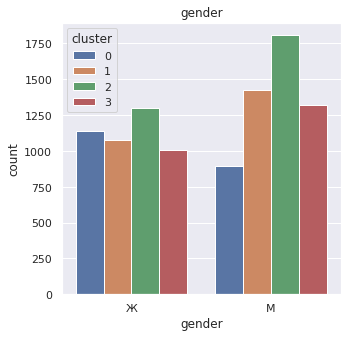

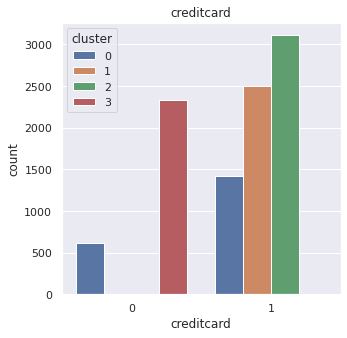

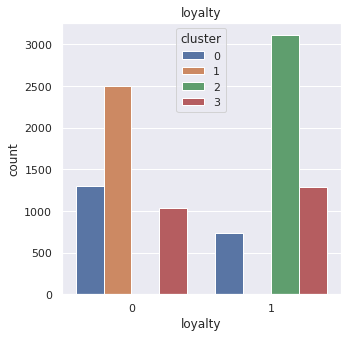

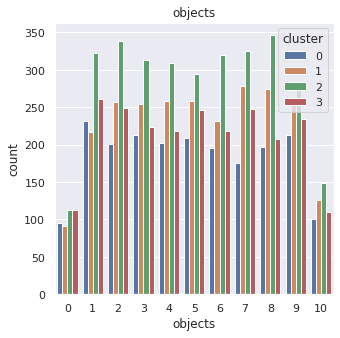

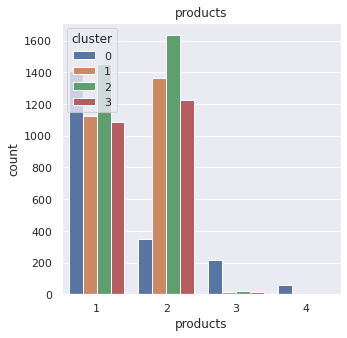

In [37]:
#строю графики и визуализирую распределения категориальных признаков
for column in ['gender', 'creditcard', 'loyalty', 'objects', 'products' ]:
    plt.figure(figsize=(5, 5))
    sns.set_theme(style="darkgrid")
    sns.countplot(x = bank[column], hue='cluster', data=bank_klaster)
    plt.title(column)
    plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Клиенты без кредитных карт расположились в третьем кластере, в нулевом кластере расположились и с картами и без, остальные кластеры с кредитными картами, по продуктом видно , что 1 продуктом пользуются все кластеры , а двумя все но нулевой кластер ушел вниз.

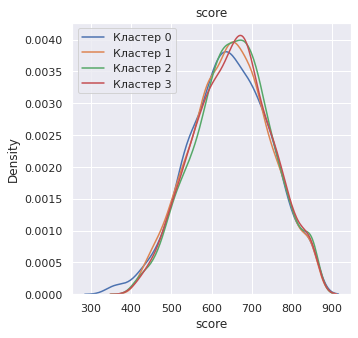

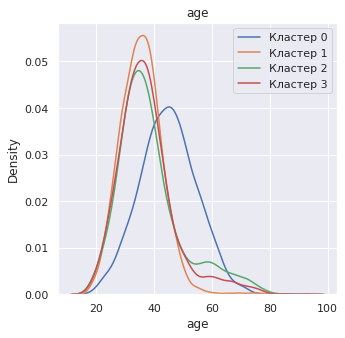

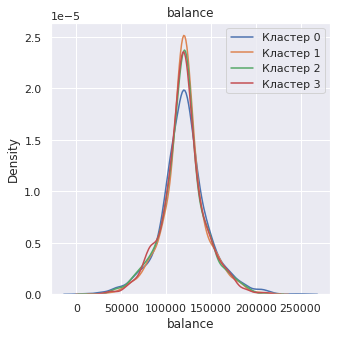

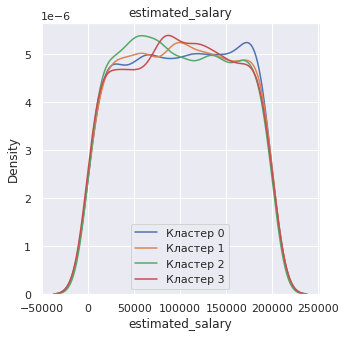

In [38]:
# строю график и визуализирую распределения числовых признаков
for column in ['score', 'age', 'balance', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(bank_klaster.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(bank_klaster.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(bank_klaster.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(bank_klaster.query('cluster==3')[column], label = 'Кластер 3')
    
    sns.set_style('darkgrid')
    plt.legend()
    plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> По скорингу , примерно одинаково, так же как и по балансу, по возрасту примерно одинаковы: кластер 0 более старшего возраста чем остальные кластеры.

<div class="alert alert-info"> <b>Вывод:</b> 1) выбрал четыре кластера, 2) стабильные кластеры 1,2 , 3) отточный кластер нулевой, 4) клиенты в основном пользуются 1-2 банковскими продуктами по все кластерам

## Сегментация с учётом количества продуктов и уровня оттока

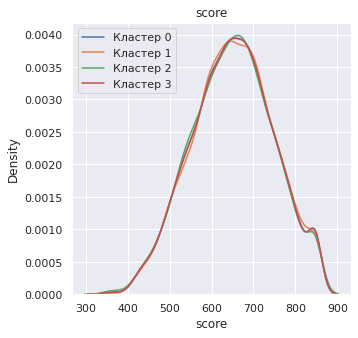

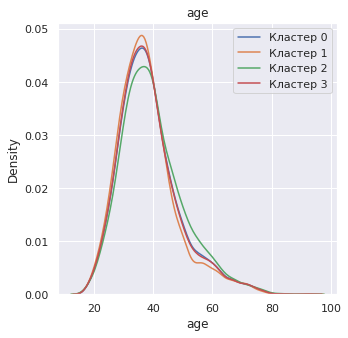

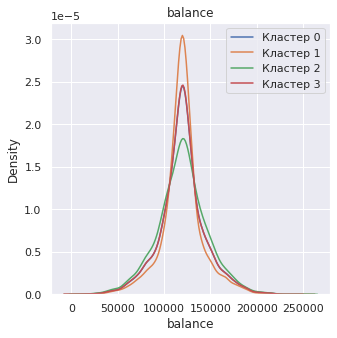

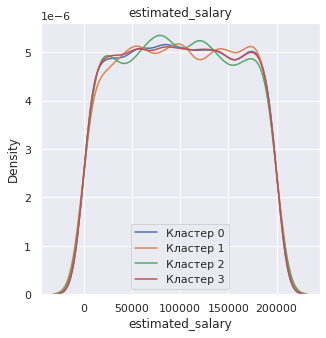

In [39]:
for column in ['score', 'age', 'balance', 'estimated_salary']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(bank_klaster.query('products!=0')[column], label = 'Кластер 0')
    sns.kdeplot(bank_klaster.query('products!=1')[column], label = 'Кластер 1')
    sns.kdeplot(bank_klaster.query('products!=2')[column], label = 'Кластер 2')
    sns.kdeplot(bank_klaster.query('products!=3')[column], label = 'Кластер 3')
    
    sns.set_style('darkgrid')
    plt.legend()
    plt.show()

In [41]:
df_temp = pd.read_csv('/datasets/bank_dataset.csv')
df_temp.columns = df_temp.columns.str.lower()
examples = [
    ("клиенты с 1 продуктом ", 'products == 1'),
    ("клиенты с 2 продуктами", 'products == 2'),
    ("клиенты с 3 продуктами", 'products == 3'),
    ("клиенты с 4 продуктами",'products == 4'),
]

churn_mean = df_temp.churn.mean()

dfs_temp = []
for text, query in examples:
    result = df_temp.query(query)\
              .agg({"churn":["mean","count"]}).T
    result.index = [text]
    dfs_temp.append(result)
df_temp = pd.concat(dfs_temp)

df_temp['churn_suplus'] = df_temp['mean'] - churn_mean

df_temp['idx'] = df_temp['count'] * df_temp['churn_suplus']

df_temp.sort_values("idx", ascending=False)\
       .drop(["idx","mean"],axis=1)\
       .style.format("{:.1%}",subset=["churn_suplus"])\
       .format("{:_.0f}",subset=["count"])

,count,churn_suplus
клиенты с 1 продуктом,5_084,7.3%
клиенты с 3 продуктами,266,62.3%
клиенты с 4 продуктами,60,79.6%
клиенты с 2 продуктами,4_590,-12.8%


## Проверка гипотез 

### Гипотеза :различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним 

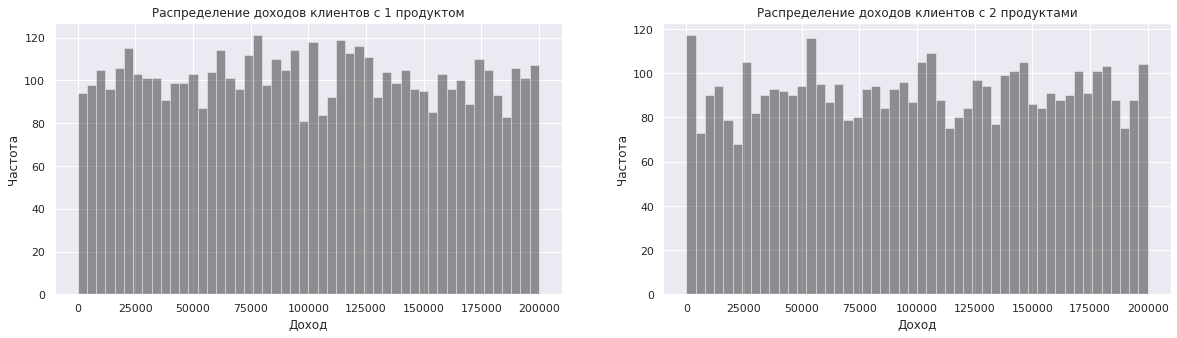

In [42]:
# визуализируем графики проверю рапределения
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

sns.distplot(bank.query('products == 1')['estimated_salary'], kde=False, ax=ax1,hist=True, bins=50, color = 'black', hist_kws={'edgecolor':'white'} )
ax1.set_title("Распределение доходов клиентов c 1 продуктом")
ax1.set_ylabel('Частота')
ax1.set_xlabel('Доход')

sns.distplot(bank.query('products == 2')['estimated_salary'], kde=False, ax=ax2,hist=True, bins=50, color = 'black', hist_kws={'edgecolor':'white'} )
ax2.set_title("Распределение доходов клиентов с 2 продуктами")
ax2.set_ylabel('Частота')
ax2.set_xlabel('Доход')

plt.show()

In [43]:
# Методом Манна-Утни оценим различия выборок и проверю нормальность рапределения, сформулирую гипотизу Н0 или Н1 с пороговым значением alpha= 0,05
alpha = 0.05

results = st.mannwhitneyu(bank.query('products == 1')['estimated_salary'], bank.query('products == 2')['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4033852286846179
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info"> <b>Комментарий студента:</b> Не получилось отвергнуть нулевую гипотезу: доходы клиентов, которые пользуются 2 услугами/продуктами , и те, которые пользуются 1, не различаются.

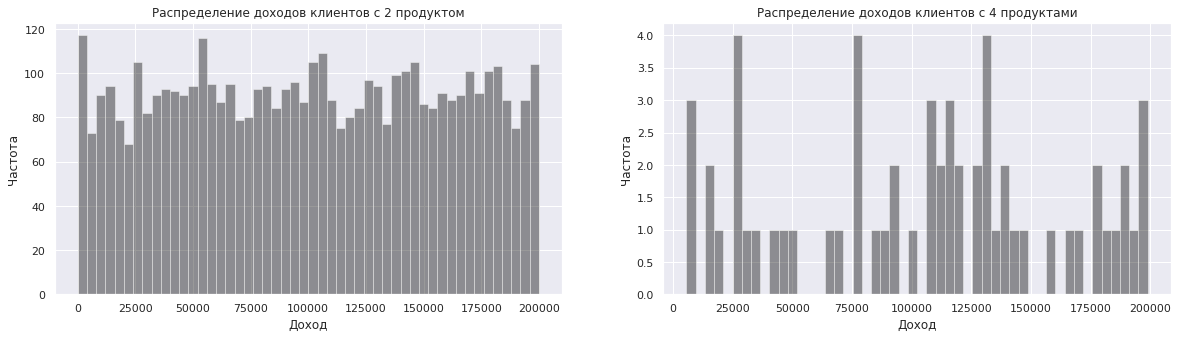

In [44]:
# визуализируем графики проверю рапределения
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

sns.distplot(bank.query('products == 2')['estimated_salary'], kde=False, ax=ax1,hist=True, bins=50, color = 'black', hist_kws={'edgecolor':'white'} )
ax1.set_title("Распределение доходов клиентов c 2 продуктом")
ax1.set_ylabel('Частота')
ax1.set_xlabel('Доход')

sns.distplot(bank.query('products == 4')['estimated_salary'], kde=False, ax=ax2,hist=True, bins=50, color = 'black', hist_kws={'edgecolor':'white'} )
ax2.set_title("Распределение доходов клиентов с 4 продуктами")
ax2.set_ylabel('Частота')
ax2.set_xlabel('Доход')

plt.show()

In [45]:
alpha = 0.05

results = st.mannwhitneyu(bank.query('products == 2')['estimated_salary'], bank.query('products == 4')['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5700617047280466
Не получилось отвергнуть нулевую гипотезу


## Выводы

<div class="alert alert-info"> <b>Общий Вывод: </b> Был проведен анализ данных клиентов банка. Можно сдлеать следующие общие выводы: 1) Был проведен анализ практически 10 тыс клиентов из трех городов, 2) Данные прошли предобработку удалены пропуенные значения 3) Основная часть клиентов с высоким уровнем доходов 4) Возраст в среднем 35-50 лет 5) В основном клиенты имеет 5 обьектов во владении 6) По полу равномерно,6) В основном используют 1-2 проудукта 7) Со Средним кредитным скорингом 8) с зп 100 тыс.+, 9) Лояльные клиенты: Использующие 1-2 банковских продукта, среднего возраста, мужчины, более 5 обьектов в собтсвенности, со средним кредитным скорингом, с хорошим достатком 10) Клиенты оттока: Использующие 3-4 банковских продукта, страшего возраста, женщины, со средним кредитным скорингом,чаще использовавшие кредитную карту 11) кластеризация выделяет 4 кластерных группы 12)Касаемо гипотезы, можно сказать что не получилось отвергнуть нулевую гипотезу: доходы клиентов, которые пользуются 2 услугами/продуктами , и те, которые пользуются 1, не различаются.

<div class="alert alert-info"> <b>Рекомендаци :</b>  1) Стабильным клиентам использующим 1-2 продукта, разработать систему клиентской работы на увеличение пользование банковскими продуктами с 1-2 до 3 + продукта, 2) Активно работать с привлечением клинетов сигмента молодого возраста до 35 лет, возможно разработать интересный банковский продукт для сегмента этого возраста, 3) Активно заняться уменьшение оттока людей старшего возраста, так же предлагать услуги интересные под старший возраст, 4) Клиенты которые используют 3-4 продукта в настоящее время и которые в большом проценте уходят в отток, заняться их удержанием по средством разработки программ лояльности для таких клиентов через используемые ими банковские продукты.

<div class="alert btn-primary"><b>Комментарий студента V_2 :</b><br> Дополнительные рекомендации : 1) по привлечению клиентов младше 35 лет . Возможно есть смысл попробовать предлагать такой продукт как дебетовые карты бесплатного обслуживания с определенными  бонусами таким как например выгодный кэшбэк на развлечения, кафе и рестораны. Так же будет актуально предлагать страховки на путешествия завязанные на карту. Актуально будет предлагать накопительные счета и карты ежемесячной капитализацией, где деньги можно будет зачислять и снимать в любой момент, ну и классика хорошие условия по кредитным картам и картам рассрочки
2) Клиенты 3-4 продуктов которые чаще уходят в отток считаются нашими клиентами более старшего возраста, поэтому можно попробовать предлагать дебетовые карты (например карту Мир) с бесплатным обслуживанием и бонусами, возьмем как пример так же выгодный кэшбек только уже на другие категории например на Аптеки с повышенными бонусами. Так же актуальны будут выгодные предложения по вкладам и тематические страховки, здоровье и недвижимость и иные страхования объектов.
</div>